In [113]:
# Imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import yfinance as yf
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import timedelta


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [114]:
def fetch_stock_data(data_frame, ticker, start_date, end_date):

    mask = (data_frame['Ticker'] == ticker) & (data_frame['Date'] >= start_date) & (data_frame['Date'] <= end_date)
    filtered_data = data_frame.loc[mask]
    return filtered_data


In [115]:
# Function to evaluate performance
def evaluate_performance(y_test_close, y_test_open, predicted_close, predicted_open):
    rmse_close = np.sqrt(mean_squared_error(y_test_close, predicted_close))
    mse_close = mean_squared_error(y_test_close, predicted_close)
    r2_close = r2_score(y_test_close, predicted_close)

    rmse_open = np.sqrt(mean_squared_error(y_test_open, predicted_open))
    mse_open = mean_squared_error(y_test_open, predicted_open)
    r2_open = r2_score(y_test_open, predicted_open)

    print(f'RMSE for Close Prices: {rmse_close:.2f}')
    print(f'MSE for Close Prices: {mse_close:.2f}')
    print(f'R-squared for Close Prices: {r2_close:.2f}')

    print(f'RMSE for Open Prices: {rmse_open:.2f}')
    print(f'MSE for Open Prices: {mse_open:.2f}')
    print(f'R-squared for Open Prices: {r2_open:.2f}')

In [116]:
# Function to show prediction graphs
def show_graph_for_open_and_close(stock_data, predicted_close, predicted_open, X_train):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axes[0].plot(stock_data.index, stock_data['Close'], label='Actual Close Prices')
    axes[0].plot(stock_data.index[X_train.shape[0]:], predicted_close, label='Predicted Close Prices')
    axes[0].set_title('Stock Close Price Prediction')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Price')
    axes[0].legend()

    axes[1].plot(stock_data.index, stock_data['Open'], label='Actual Open Prices')
    axes[1].plot(stock_data.index[X_train.shape[0]:], predicted_open, label='Predicted Open Prices')
    axes[1].set_title('Stock Open Price Prediction')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Price')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

In [118]:
# Define the list of 40 stock companies to analyze
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'IBM', 'GOOG', 'BABA', 'NFLX', 'INTC',
                   'CSCO', 'VZ', 'DIS', 'GS', 'JPM', 'BA', 'KO', 'PEP', 'JNJ', 'PG',
                   'WMT', 'HD', 'UNH', 'MMM', 'MCD', 'CAT', 'GE', 'KO', 'XOM', 'CVX',
                   'AAP', 'WFC', 'C', 'MS', 'GS', 'JPM', 'BA', 'INTC', 'AMD', 'NVDA']
                   

In [119]:
# select data range
start_date = pd.Timestamp('2021-01-05')
end_date = pd.Timestamp('2024-01-05')


Fetching the historical stock data from yfinance

In [120]:
# Create an empty DataFrame to store stock data
tickers_stock_data = pd.DataFrame()

# Fetch the historical data for each Ticker and combine them into dataset
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Date'] = pd.to_datetime(data.index)
    data['Ticker'] = ticker
    tickers_stock_data = pd.concat([tickers_stock_data, data])

    print(tickers_stock_data.shape)

    

d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 compl

(755, 8)
(1510, 8)
(2265, 8)
(3020, 8)
(3775, 8)



d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 comp

(4530, 8)
(5285, 8)
(6040, 8)
(6795, 8)
(7550, 8)
(8305, 8)



d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 comp

(9060, 8)
(9815, 8)
(10570, 8)
(11325, 8)
(12080, 8)
(12835, 8)



d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 comp

(13590, 8)
(14345, 8)
(15100, 8)
(15855, 8)
(16610, 8)
(17365, 8)


[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta inste

(18120, 8)
(18875, 8)
(19630, 8)


[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta inste

(20385, 8)
(21140, 8)
(21895, 8)
(22650, 8)



d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 comp

(23405, 8)
(24160, 8)
(24915, 8)
(25670, 8)



d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 comp

(26425, 8)
(27180, 8)
(27935, 8)
(28690, 8)



d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed

(29445, 8)
(30200, 8)


In [121]:
# save the historical data to a CSV
tickers_stock_data.to_csv('stock_data.csv', index=False)


In [122]:
# Read the CSV file
tickers_stock_data = pd.read_csv('stock_data.csv')
print(tickers_stock_data.shape)


(30200, 8)


Data Preprocessing:

In [123]:
# Dispaly the first few rows of the data set
print("First few rows of the data set:")
print(tickers_stock_data.head())

# Display DataFrame index of the data set
print("\nIndex of the DataFrame:\n")
print(tickers_stock_data.index)

# Display columns of the data set
print("\nColumns of the DataFrame:\n")
print(tickers_stock_data.columns)

# Display information of the data set
print("\nInformation of the data set:\n")
print(tickers_stock_data.info())


First few rows of the data set:
         Open        High         Low       Close   Adj Close     Volume  \
0  128.889999  131.740005  128.429993  131.009995  128.736389   97664900   
1  127.720001  131.050003  126.379997  126.599998  124.402939  155088000   
2  128.360001  131.630005  127.860001  130.919998  128.647949  109578200   
3  132.429993  132.630005  130.229996  132.050003  129.758362  105158200   
4  129.190002  130.169998  128.500000  128.979996  126.741623  100384500   

         Date Ticker  
0  2021-01-05   AAPL  
1  2021-01-06   AAPL  
2  2021-01-07   AAPL  
3  2021-01-08   AAPL  
4  2021-01-11   AAPL  

Index of the DataFrame:

RangeIndex(start=0, stop=30200, step=1)

Columns of the DataFrame:

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date',
       'Ticker'],
      dtype='object')

Information of the data set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 8 columns):
 #   Column     Non-Null Count

Changing data types & Encoding Categorycal Variable

In [125]:
# Change the data type of the 'Ticker' column to categorical
tickers_stock_data['Ticker'] = tickers_stock_data['Ticker'].astype('category')

# Change the data type of the 'Date' column to datetime
tickers_stock_data['Date'] = pd.to_datetime(tickers_stock_data['Date'])

# Display the data types of columns to confirm the change
print("Data types after changing:")
print(tickers_stock_data.dtypes)


Data types after changing:
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Date         datetime64[ns]
Ticker             category
dtype: object


Select the Company

In [126]:
selected_ticker = 'AAPL'

stock_data = fetch_stock_data(tickers_stock_data, selected_ticker, start_date, end_date)
print(stock_data.head())


         Open        High         Low       Close   Adj Close     Volume  \
0  128.889999  131.740005  128.429993  131.009995  128.736389   97664900   
1  127.720001  131.050003  126.379997  126.599998  124.402939  155088000   
2  128.360001  131.630005  127.860001  130.919998  128.647949  109578200   
3  132.429993  132.630005  130.229996  132.050003  129.758362  105158200   
4  129.190002  130.169998  128.500000  128.979996  126.741623  100384500   

        Date Ticker  
0 2021-01-05   AAPL  
1 2021-01-06   AAPL  
2 2021-01-07   AAPL  
3 2021-01-08   AAPL  
4 2021-01-11   AAPL  


In [127]:
stock_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 754
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       755 non-null    float64       
 1   High       755 non-null    float64       
 2   Low        755 non-null    float64       
 3   Close      755 non-null    float64       
 4   Adj Close  755 non-null    float64       
 5   Volume     755 non-null    int64         
 6   Date       755 non-null    datetime64[ns]
 7   Ticker     755 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 49.2 KB


Handling Missing Values

In [88]:
# Check for missing values
missing_values = stock_data.isnull().sum()
print("\nMissing Values:\n")
print(missing_values)

# Handle missing values
if missing_values.any():
    empty_value_data = stock_data[stock_data.isna().any(axis=1)]
    imputer = SimpleImputer(strategy='most_frequent')
    imputer.fit(stock_data)
    new_data = imputer.transform(stock_data)

    stock_data = pd.DataFrame(new_data, columns=stock_data.columns)
    print(stock_data.head(5))
    print("Missing values imputed.")
else:
    print("No missing values found.")
    


Missing Values:

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
Ticker       0
dtype: int64
No missing values found.


Handling Dublicate Records

In [128]:
# Check for duplicate rows
duplicate_rows = stock_data.duplicated()

# Display the number of duplicate rows
print("\nNumber of duplicate rows:", duplicate_rows.sum())

# Drop duplicate rows
if duplicate_rows.any():
    stock_data = stock_data.drop_duplicates()
    print("Duplicate rows dropped.")
else:
    print("No duplicate rows found.")

# Display the shape of the dataframe after removing duplicates
print("Shape after removing duplicates:", stock_data.shape)



Number of duplicate rows: 0
No duplicate rows found.
Shape after removing duplicates: (755, 8)


Exploratory Data Analysis (EDA)

In [129]:
# Plotting High and Low points
fig_high_low = go.Figure()

# Plot High points
fig_high_low.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['High'], mode='lines', name='High'))
# Plot Low points
fig_high_low.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Low'], mode='lines', name='Low'))

fig_high_low.update_layout(
    title='High and Low Prices of AAPL Stock Over Time',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    template='plotly_dark',
    height=400, 
    width=800
)
fig_high_low.show()


In [130]:
# Plotting Open and Close prices
fig_open_close = go.Figure()

# Plot Open prices
fig_open_close.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Open'], mode='lines', name='Open'))
# Plot Close prices
fig_open_close.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], mode='lines', name='Close'))

fig_open_close.update_layout(
    title='Open and Close Prices of AAPL Stock Over Time',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    template='plotly_dark',
    height=600,
    width=1000
)
fig_open_close.show()


In [131]:
# Calculate the correlations between numeric columns
numeric_columns = stock_data.select_dtypes(include =[np.number])
correlation_matrix = numeric_columns.corr()

# Display the correlation metrix
print("\nCorrelation Matrix:\n")
print(correlation_matrix)



Correlation Matrix:

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.997566  0.997371  0.993679   0.993438 -0.389592
High       0.997566  1.000000  0.997010  0.997122   0.996768 -0.368557
Low        0.997371  0.997010  1.000000  0.997301   0.997052 -0.414732
Close      0.993679  0.997122  0.997301  1.000000   0.999626 -0.392885
Adj Close  0.993438  0.996768  0.997052  0.999626   1.000000 -0.401747
Volume    -0.389592 -0.368557 -0.414732 -0.392885  -0.401747  1.000000


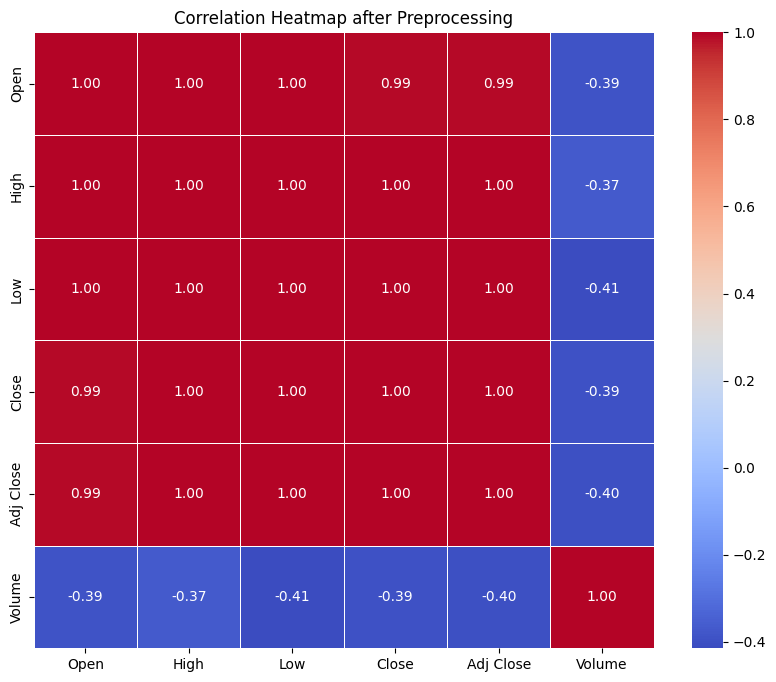

In [132]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap after Preprocessing')
plt.show()


Scaling and Normalization

In [133]:
# Selecting only numeric columns for simplicity
numeric_columns = stock_data.select_dtypes(include=np.number)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to my numeric data
iso_forest.fit(numeric_columns)

# Predict outliers
outliers = iso_forest.predict(numeric_columns) == -1

# Display the number of outliers
print("Number of outliers:", outliers.sum())

# Display rows with outliers
print("\nRows with outliers:")
print(stock_data[outliers])

# Handle outliers by replacing with median
stock_data.loc[outliers, numeric_columns.columns] = stock_data[numeric_columns.columns].median()

# Display data after handling outliers
print("\nData after handling outliers:")
print(stock_data.head())


Number of outliers: 38

Rows with outliers:
           Open        High         Low       Close   Adj Close     Volume  \
1    127.720001  131.050003  126.379997  126.599998  124.402939  155088000   
17   135.830002  136.740005  130.210007  131.960007  129.669922  177523800   
33   123.760002  126.709999  118.389999  125.860001  123.860573  158273000   
35   124.680000  126.459999  120.540001  120.989998  119.067932  148199500   
36   122.589996  124.849998  121.199997  121.260002  119.333656  164560400   
40   121.750000  123.599998  118.620003  120.129997  118.221603  178155000   
41   120.980003  121.940002  117.570000  121.419998  119.491104  153766600   
42   120.930000  121.000000  116.209999  116.360001  114.511497  154376600   
43   119.029999  122.059998  118.790001  121.089996  119.166336  129525800   
44   121.690002  122.169998  119.449997  119.980003  118.074013  111943300   
46   120.400002  121.169998  119.160004  121.029999  119.107315   88105100   
47   121.410004  124

Feature Selection

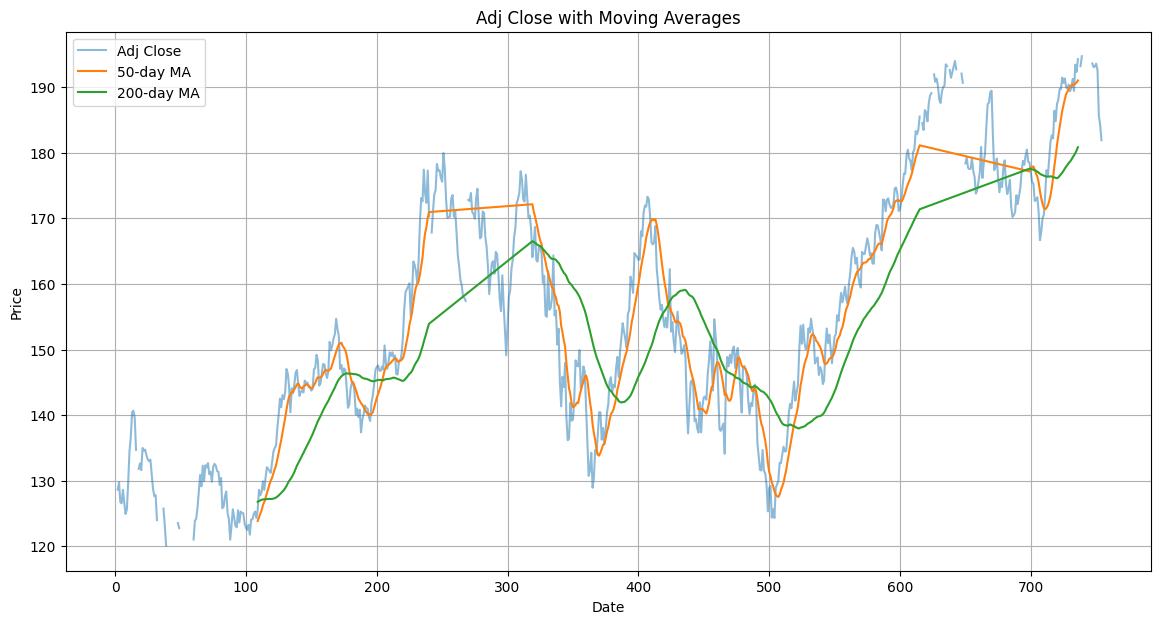

In [135]:
# Calculate 10-day and 50-day moving averages
stock_data.loc[:, 'MA_50'] = stock_data['Adj Close'].rolling(window=10).mean()
stock_data.loc[:, 'MA_200'] = stock_data['Adj Close'].rolling(window=50).mean()

# Drop rows with NaN values in the moving averages
stock_data_ma = stock_data.dropna(subset=['MA_50', 'MA_200'])

# Plot the 'Adj Close' along with moving averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Adj Close'], label='Adj Close', alpha=0.5)  # Original data with transparency
plt.plot(stock_data_ma.index, stock_data_ma['MA_50'], label='50-day MA')
plt.plot(stock_data_ma.index, stock_data_ma['MA_200'], label='200-day MA')

# Customize the plot
plt.title('Adj Close with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [136]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Ticker,MA_50,MA_200
0,128.889999,131.740005,128.429993,131.009995,128.736389,97664900.0,2021-01-05,AAPL,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,AAPL,NaN,NaN
2,128.360001,131.630005,127.860001,130.919998,128.647949,109578200.0,2021-01-07,AAPL,NaN,NaN
3,132.429993,132.630005,130.229996,132.050003,129.758362,105158200.0,2021-01-08,AAPL,NaN,NaN
4,129.190002,130.169998,128.500000,128.979996,126.741623,100384500.0,2021-01-11,AAPL,NaN,NaN


In [137]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 754
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       717 non-null    float64       
 1   High       717 non-null    float64       
 2   Low        717 non-null    float64       
 3   Close      717 non-null    float64       
 4   Adj Close  717 non-null    float64       
 5   Volume     717 non-null    float64       
 6   Date       755 non-null    datetime64[ns]
 7   Ticker     755 non-null    category      
 8   MA_50      619 non-null    float64       
 9   MA_200     467 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(8)
memory usage: 61.0 KB


In [141]:
stock_data = stock_data.copy()

stock_data['Date'] = pd.to_datetime (stock_data.index)
stock_data['day'] = stock_data['Date'].dt.day
stock_data['month'] = stock_data['Date'].dt.month
stock_data['year'] = stock_data['Date'].dt.year
stock_data[['day', 'month', 'year']].head()


,day,month,year
0,1,1,1970
1,1,1,1970
2,1,1,1970
3,1,1,1970
4,1,1,1970


In [142]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 754
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       717 non-null    float64       
 1   High       717 non-null    float64       
 2   Low        717 non-null    float64       
 3   Close      717 non-null    float64       
 4   Adj Close  717 non-null    float64       
 5   Volume     717 non-null    float64       
 6   Date       755 non-null    datetime64[ns]
 7   Ticker     755 non-null    category      
 8   MA_50      619 non-null    float64       
 9   MA_200     467 non-null    float64       
 10  month      755 non-null    int32         
 11  year       755 non-null    int32         
 12  day        755 non-null    int32         
dtypes: category(1), datetime64[ns](1), float64(8), int32(3)
memory usage: 69.9 KB


In [148]:
# Split the data into features (X) and target variables (y)
X = stock_data['Adj Close']
y = stock_data['Predictions']

"""
# Split the data into features (X) and target variables (y)
X = stock_data[['day', 'month', 'year']]
y_close = stock_data['Close'].values
y_open = stock_data['Open'].values
"""

In [153]:
# Function to scale input features
def scale_input(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_scaled = scaler.fit_transform(X)
    return X_scaled

In [154]:
# Split the data into training and testing sets
X_train, X_test, y_train_close, y_test_close, y_train_open, y_test_open = train_test_split(
    scale_input(X), y_close, y_open, test_size=0.2, random_state=42
)


In [155]:
# Generate new dates for the next three months
num_months = 3
new_dates = pd.date_range(end_date + pd.DateOffset(days=1), end_date + pd.DateOffset(months=num_months)).date
days = [date.day for date in new_dates]
months = [date.month for date in new_dates]
years = [date.year for date in new_dates]
date_info_df = pd.DataFrame({'day': days, 'month': months, 'year': years})


In [156]:
date_info_df.head(10)

,day,month,year
0,6,1,2024
1,7,1,2024
2,8,1,2024
3,9,1,2024
4,10,1,2024
5,11,1,2024
6,12,1,2024
7,13,1,2024
8,14,1,2024
9,15,1,2024


In [159]:
stock_data.tail(50)

,Open,High,Low,Close,Adj Close,Volume,Date,Ticker,MA_50,MA_200,month,year,day
705,173.050003,173.669998,171.449997,173.440002,173.211807,43816600.0,1970-01-01 00:00:00.000000705,AAPL,176.352667,177.106872,1,1970,1
706,171.880005,173.059998,170.649994,171.100006,170.874893,57157000.0,1970-01-01 00:00:00.000000706,AAPL,175.483813,176.980039,1,1970,1
707,170.369995,171.380005,165.669998,166.889999,166.670425,70625300.0,1970-01-01 00:00:00.000000707,AAPL,174.103632,176.786694,1,1970,1
708,166.910004,168.960007,166.830002,168.220001,167.998672,58499100.0,1970-01-01 00:00:00.000000708,AAPL,173.042030,176.671246,1,1970,1
709,169.020004,171.169998,168.869995,170.289993,170.065933,51131000.0,1970-01-01 00:00:00.000000709,AAPL,172.200137,176.587356,1,1970,1
710,169.350006,170.899994,167.899994,170.770004,170.545319,44846000.0,1970-01-01 00:00:00.000000710,AAPL,171.562978,176.486089,1,1970,1
711,171.000000,174.229996,170.119995,173.970001,173.741104,56934900.0,1970-01-01 00:00:00.000000711,AAPL,171.376224,176.420975,1,1970,1
712,175.520004,177.779999,175.460007,177.570007,177.336380,77334800.0,1970-01-01 00:00:00.000000712,AAPL,171.586946,176.350069,1,1970,1
713,174.240005,176.820007,173.350006,176.649994,176.417572,79763700.0,1970-01-01 00:00:00.000000713,AAPL,171.963449,176.355462,1,1970,1
714,176.380005,179.429993,176.210007,179.229996,178.994186,63841300.0,1970-01-01 00:00:00.000000714,AAPL,172.585629,176.367845,1,1970,1


In [157]:
# Gradient Boosting
param_grid_gb = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [3, 5, 7]
}
model_gb = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
grid_search_gb = GridSearchCV(model_gb, param_grid_gb, cv=5, n_jobs=-1)
grid_search_gb.fit(X_train, list(zip(y_train_close, y_train_open)))
model_gb = grid_search_gb.best_estimator_
predicted_gb = model_gb.predict(X_test)
predicted_close_gb = predicted_gb[:, 0]
predicted_open_gb = predicted_gb[:, 1]


ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\sklearn\multioutput.py", line 239, in fit
    y = self._validate_data(X="no_validation", y=y, multi_output=True)
  File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\sklearn\base.py", line 635, in _validate_data
    out = _check_y(y, **check_params)
  File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\sklearn\utils\validation.py", line 1218, in _check_y
    y = check_array(
  File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\sklearn\utils\validation.py", line 1003, in check_array
    _assert_all_finite(
  File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\sklearn\utils\validation.py", line 126, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\sklearn\utils\validation.py", line 175, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input y contains NaN.


In [ ]:
# Support Vector Regressor (SVR)
param_grid_svr = {
    'estimator__C': [0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf']
}
model_svr = MultiOutputRegressor(SVR())
grid_search_svr = GridSearchCV(model_svr, param_grid_svr, cv=5, n_jobs=-1)
grid_search_svr.fit(X_train, list(zip(y_train_close, y_train_open)))
model_svr = grid_search_svr.best_estimator_
predicted_svr = model_svr.predict(X_test)
predicted_close_svr = predicted_svr[:, 0]
predicted_open_svr = predicted_svr[:, 1]


In [ ]:
# ARIMA
order = (1, 1, 1)
model_close_arima = ARIMA(stock_data['Close'].reset_index(drop=True), order=order)
model_close_arima.fit()
forecast_steps = len(X_test)
forecast_close_arima = model_close_arima.forecast(steps=forecast_steps)

model_open_arima = ARIMA(stock_data['Open'].reset_index(drop=True), order=order)
model_open_arima.fit()
forecast_open_arima = model_open_arima.forecast(steps=forecast_steps)


In [ ]:
# Random Forest Regressor
param_grid_rf = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}
model_rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, list(zip(y_train_close, y_train_open)))
model_rf = grid_search_rf.best_estimator_
predicted_rf = model_rf.predict(X_test)
predicted_close_rf = predicted_rf[:, 0]
predicted_open_rf = predicted_rf[:, 1]


In [ ]:
# Evaluate and show graphs for each model
print("Gradient Boosting Results:")
evaluate_performance(y_test_close, y_test_open, predicted_close_gb, predicted_open_gb)
show_graph_for_open_and_close(stock_data, predicted_close_gb, predicted_open_gb, X_train)

print("\nSupport Vector Regressor (SVR):")
evaluate_performance(y_test_close, y_test_open, predicted_close_svr, predicted_open_svr)
show_graph_for_open_and_close(stock_data, predicted_close_svr, predicted_open_svr, X_train)

print("\nARIMA:")
evaluate_performance(y_test_close, y_test_open, forecast_close_arima, forecast_open_arima)
show_graph_for_open_and_close(stock_data, forecast_close_arima, forecast_open_arima, X_train)

print("\nRandom Forest Regressor:")
evaluate_performance(y_test_close, y_test_open, predicted_close_rf, predicted_open_rf)
show_graph_for_open_and_close(stock_data, predicted_close_rf, predicted_open_rf, X_train)

In [20]:

# Initialize the MinMaxScaler for normalization
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected features
normalized_data = scaler.fit_transform(numeric_columns)

# Convert the normalized data back to a DataFrame (if needed)
stock_data = pd.DataFrame(normalized_data, columns=numeric_columns.columns)

# Display the normalized data
print("\nNormalized Data:")
print(stock_data.head())



Normalized Data:
       Open      High       Low     Close  Adj Close    Volume
0  0.124826  0.143146  0.151256  0.179205   0.170157  0.429541
1  0.110014  0.134436  0.125882  0.125260   0.118321  0.764595
2  0.118116  0.141757  0.144201  0.178104   0.169099  0.499053
3  0.169642  0.154380  0.173536  0.191927   0.182382  0.473263
4  0.128624  0.123327  0.152123  0.154373   0.146296  0.445409



Correlation Matrix after Normalization:

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.997566  0.997371  0.993679   0.993438 -0.389592
High       0.997566  1.000000  0.997010  0.997122   0.996768 -0.368557
Low        0.997371  0.997010  1.000000  0.997301   0.997052 -0.414732
Close      0.993679  0.997122  0.997301  1.000000   0.999626 -0.392885
Adj Close  0.993438  0.996768  0.997052  0.999626   1.000000 -0.401747
Volume    -0.389592 -0.368557 -0.414732 -0.392885  -0.401747  1.000000


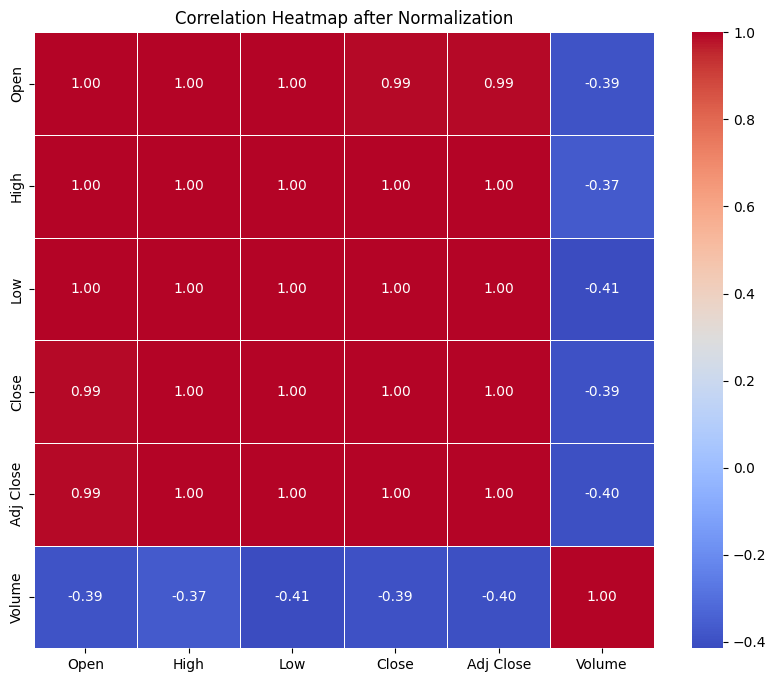

In [21]:
# Calculate the correlations between numeric columns after normalization
numeric_columns_normalized = stock_data

# Display the correlation matrix after normalization
correlation_matrix_normalized = numeric_columns_normalized.corr()
print("\nCorrelation Matrix after Normalization:\n")
print(correlation_matrix_normalized)


# Create a heatmap of the correlation matrix after normalization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap after Normalization')
plt.show()

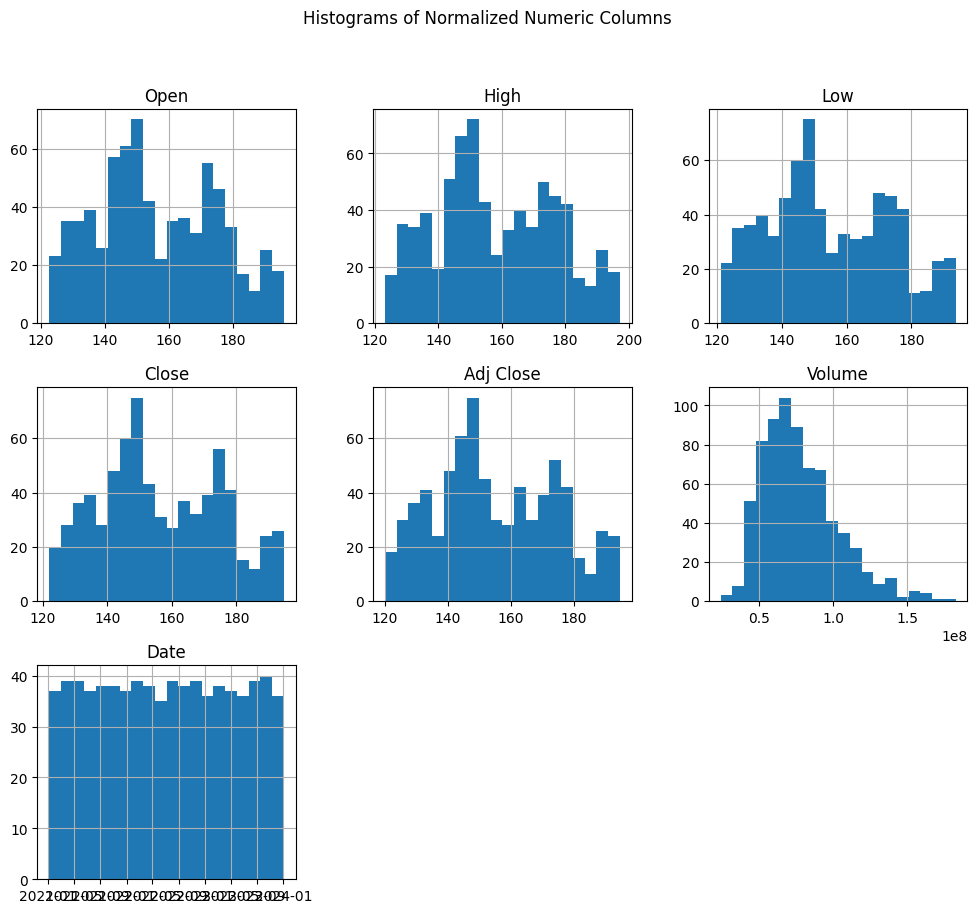

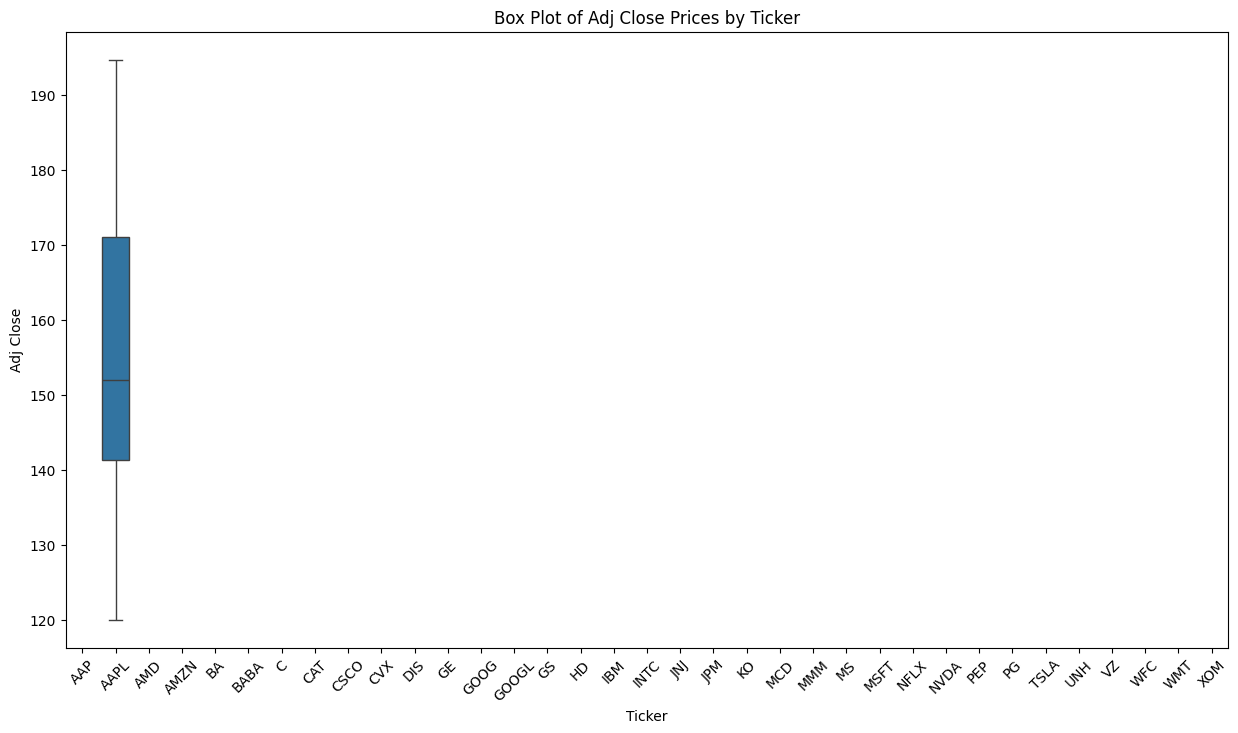

In [42]:
# Plot histograms for normalized numeric columns
stock_data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Normalized Numeric Columns')
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(x='Ticker', y='Adj Close', data=stock_data)
plt.title('Box Plot of Adj Close Prices by Ticker')
plt.xticks(rotation=45) 
plt.show()



In [ ]:
# Drop the 'Volume' column from the dataset
stock_data2 = stock_data.drop('Volume', axis=1)

# Display the data after dropping the 'Volume' column
print("Data after dropping 'Volume' column:")
print(stock_data2.head())

# Recalculate the correlations between numeric columns
numeric_columns = stock_data2.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

# Display the updated correlation matrix
print("\nUpdated Correlation Matrix:")
print(correlation_matrix)


In [ ]:
# Create a heatmap of the updated correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [141]:
import plotly.offline as pyo
pd.options.plotting.backend = 'plotly'

Close = selected_stock_data.Close
Close.plot()

In [40]:

# Step 1: Feature Selection
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Step 2: Data Preprocessing
selected_stock_data['Predictions'] = selected_stock_data['Close'].shift(-7)  # Shift by 7 days to predict the 7th day
selected_stock_data = selected_stock_data.dropna()

# Step 3: Split the Data
X = selected_stock_data[features]
y = selected_stock_data['Predictions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Step 5: Support Vector Regression
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)


# Step 6: Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Step 7: Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Convert data to a format suitable for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_stock_data[features + ['Predictions']])

X_lstm, y_lstm = [], []

for i in range(60, len(scaled_data)):
    X_lstm.append(scaled_data[i-60:i, :-1])  # Exclude 'Predictions' column
    y_lstm.append(scaled_data[i, -1])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))  # 1 unit for predicting the 7th day
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

model_lstm.fit(X_lstm, y_lstm, epochs=10, batch_size=32)

# Make predictions using the LSTM model
inputs = scaled_data[-60:]
inputs = np.array([inputs])
predicted_price = model_lstm.predict(inputs)
predicted_price = scaler.inverse_transform(np.hstack([inputs[0, :, :-1], predicted_price]))

# Step 9: Model Comparison
linear_mse = mean_squared_error(y_test, linear_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
lstm_mse = model_lstm.evaluate(X_test, y_test, verbose=0)

print(f'Linear Regression MSE: {linear_mse}')
print(f'SVR MSE: {svr_mse}')
print(f'Decision Tree MSE: {dt_mse}')
print(f'Random Forest MSE: {rf_mse}')
print(f'LSTM MSE: {lstm_mse}')

# Choose the best-performing model based on MSE for ensembling

# Step 10: Hybrid Model (Ensembling)
best_model = linear_model  # Change this based on the actual performance
ensemble_pred = 0.25 * linear_pred + 0.25 * svr_pred + 0.25 * dt_pred + 0.25 * rf_pred  # Adjust weights based on model performance

# Evaluate the ensembled model
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
print(f'Ensemble MSE: {ensemble_mse}')



Epoch 1/10
20/20 [==============================] - 6s 30ms/step - loss: 0.0610
Epoch 2/10
20/20 [==============================] - 1s 30ms/step - loss: 0.0161
Epoch 3/10
20/20 [==============================] - 1s 31ms/step - loss: 0.0137
Epoch 4/10
20/20 [==============================] - 1s 30ms/step - loss: 0.0130
Epoch 5/10
20/20 [==============================] - 1s 31ms/step - loss: 0.0133
Epoch 6/10
20/20 [==============================] - 1s 34ms/step - loss: 0.0127
Epoch 7/10
20/20 [==============================] - 1s 30ms/step - loss: 0.0121
Epoch 8/10
20/20 [==============================] - 1s 32ms/step - loss: 0.0119
Epoch 9/10
20/20 [==============================] - 1s 31ms/step - loss: 0.0119
Epoch 10/10
20/20 [==============================] - 1s 32ms/step - loss: 0.0113


ValueError: in user code:

    File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\BCAS\Machine learning\Assessment\Assessment Project\Stock Market\.venv\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 60, 5), found shape=(None, 60, 6)


In [64]:
# Step 1: Feature Selection
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Step 2: Data Preprocessing
selected_stock_data['Predictions'] = selected_stock_data['Adj Close'].shift(-30)  # Shift by 30 days to predict the 30th day
selected_stock_data = selected_stock_data.dropna()

# Step 3: Split the Data
X = selected_stock_data[features]
y = selected_stock_data['Predictions']

# Function to evaluate models for different prediction periods
def evaluate_model(model, X_train, X_test, y_train, y_test, days):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f'Model Evaluation for {days} days:')
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')
    print('\n')

# Loop through different prediction periods
for days in [1, 7, 30]:
    print(f'----- Prediction for {days} Days -----')
    
    # Update the target variable for the current prediction period
    selected_stock_data['Predictions'] = selected_stock_data['Adj Close'].shift(-days)
    selected_stock_data = selected_stock_data.dropna()

    # Split the Data
    X = selected_stock_data[features]
    y = selected_stock_data['Predictions']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and evaluate Linear Regression
    linear_model = LinearRegression()
    evaluate_model(linear_model, X_train, X_test, y_train, y_test, days)
    
    # Initialize and evaluate Support Vector Regression
    svr_model = SVR()
    evaluate_model(svr_model, X_train, X_test, y_train, y_test, days)
    
    # Initialize and evaluate Decision Tree Regression
    dt_model = DecisionTreeRegressor()
    evaluate_model(dt_model, X_train, X_test, y_train, y_test, days)
    
    # Initialize and evaluate Random Forest Regression
    rf_model = RandomForestRegressor()
    evaluate_model(rf_model, X_train, X_test, y_train, y_test, days)
    
    print('\n')

C:\Users\Gihan\AppData\Local\Temp\ipykernel_3664\1232130773.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_stock_data['Predictions'] = selected_stock_data['Adj Close'].shift(-30)  # Shift by 30 days to predict the 30th day


----- Prediction for 1 Days -----
Model Evaluation for 1 days:
Mean Squared Error: 7.298986335202544
R2 Score: 0.981276655326449


Model Evaluation for 1 days:
Mean Squared Error: 319.8626561104453
R2 Score: 0.1794889751102441


Model Evaluation for 1 days:
Mean Squared Error: 15.074550848021767
R2 Score: 0.9613307932958818


Model Evaluation for 1 days:
Mean Squared Error: 8.520449692104682
R2 Score: 0.9781433600458302




----- Prediction for 7 Days -----
Model Evaluation for 7 days:
Mean Squared Error: 49.609477990023386
R2 Score: 0.8556917923692406


Model Evaluation for 7 days:
Mean Squared Error: 304.3894649252973
R2 Score: 0.11456641180765526


Model Evaluation for 7 days:
Mean Squared Error: 98.86578773747982
R2 Score: 0.7124109101235052


Model Evaluation for 7 days:
Mean Squared Error: 54.98301562705405
R2 Score: 0.8400607957037997




----- Prediction for 30 Days -----
Model Evaluation for 30 days:
Mean Squared Error: 162.41896662631703
R2 Score: 0.531748825646486


Model Ev

Linear Regression MSE: 48.38777562005624
SVR MSE: 53.01951528058866
Decision Tree MSE: 101.92530491266214
Random Forest MSE: 76.671605675844


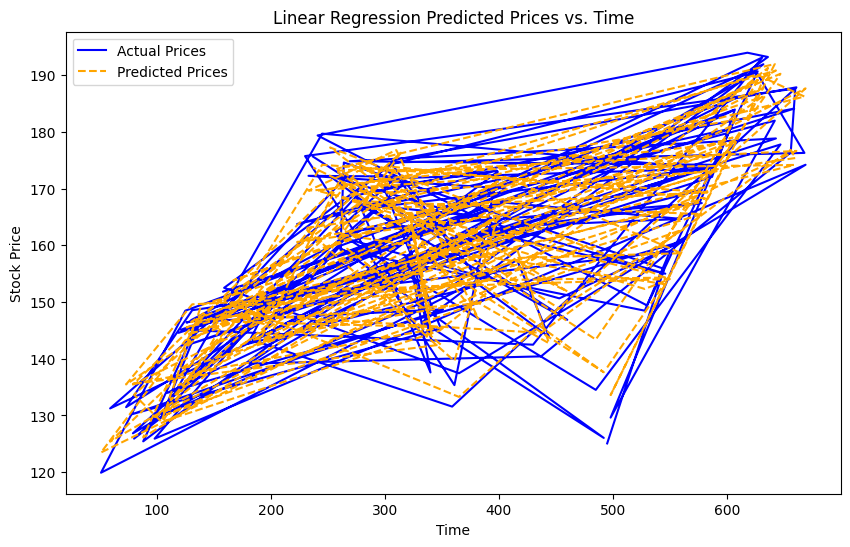

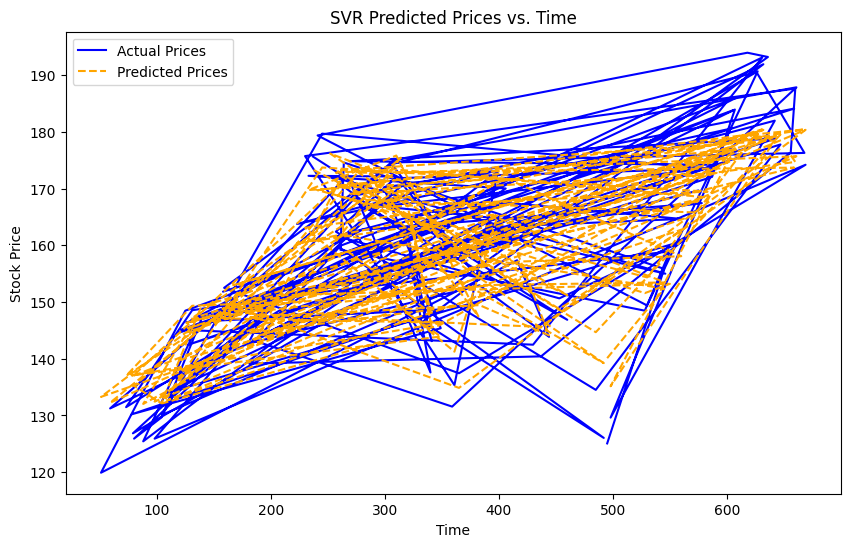

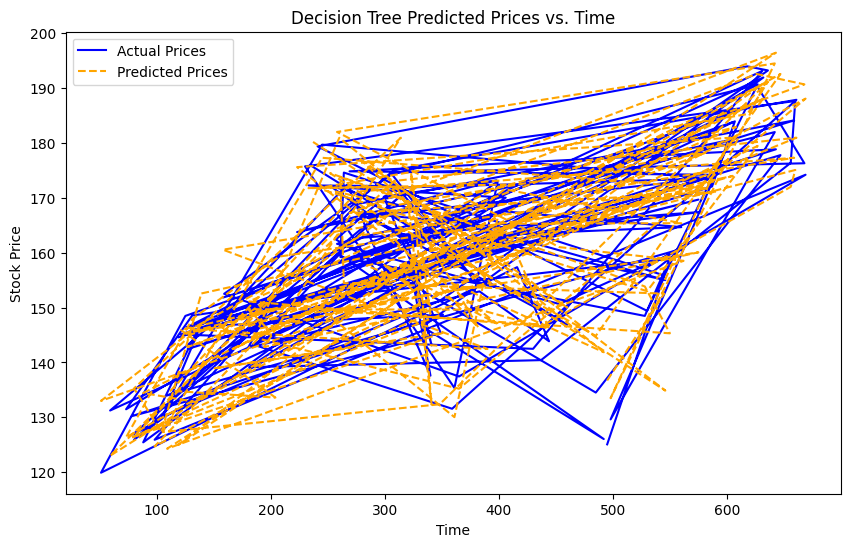

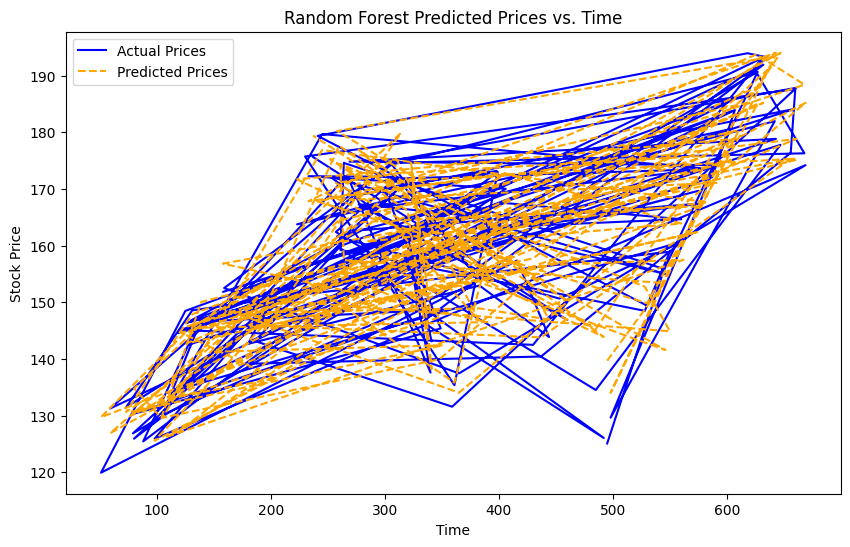

In [66]:
# Step 1: Feature Selection
features = ['Adj Close']

# Step 2: Data Preprocessing
selected_stock_data['Predictions'] = selected_stock_data['Close'].shift(-7)  # Shift by 7 days to predict the 7th day
selected_stock_data = selected_stock_data.dropna()

# Step 3: Split the Data
X = selected_stock_data[features]
y = selected_stock_data['Predictions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Step 5: Support Vector Regression
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)

# Step 6: Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Step 7: Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

"""
# Convert data to a format suitable for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_stock_data[features + ['Predictions']])

X_lstm, y_lstm = [], []

for i in range(60, len(scaled_data)):
    X_lstm.append(scaled_data[i-60:i, :-1])  # Exclude 'Predictions' column
    y_lstm.append(scaled_data[i, -1])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))  # 1 unit for predicting the 7th day
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

model_lstm.fit(X_lstm, y_lstm, epochs=10, batch_size=32)

# Make predictions using the LSTM model
inputs = scaled_data[-60:]
inputs = np.array([inputs])
predicted_price = model_lstm.predict(inputs)
predicted_price = scaler.inverse_transform(np.hstack([inputs[0, :, :-1], predicted_price]))

"""
# Step 9: Model Comparison
linear_mse = mean_squared_error(y_test, linear_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
#lstm_mse = model_lstm.evaluate(X_test, y_test, verbose=0)

print(f'Linear Regression MSE: {linear_mse}')
print(f'SVR MSE: {svr_mse}')
print(f'Decision Tree MSE: {dt_mse}')
print(f'Random Forest MSE: {rf_mse}')
#print(f'LSTM MSE: {lstm_mse}')

# Visualize Predicted Prices vs. Time for each regression model
def visualize_predictions(model_name, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, predictions, label='Predicted Prices', linestyle='--', color='orange')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Plot Linear Regression Predictions
visualize_predictions('Linear Regression', linear_pred, 'Linear Regression Predicted Prices vs. Time')

# Plot Support Vector Regression Predictions
visualize_predictions('Support Vector Regression', svr_pred, 'SVR Predicted Prices vs. Time')

# Plot Decision Tree Regression Predictions
visualize_predictions('Decision Tree Regression', dt_pred, 'Decision Tree Predicted Prices vs. Time')

# Plot Random Forest Regression Predictions
visualize_predictions('Random Forest Regression', rf_pred, 'Random Forest Predicted Prices vs. Time')

# Plot LSTM Predictions
#visualize_predictions('LSTM', predicted_price.flatten(), 'LSTM Predicted Prices vs. Time')


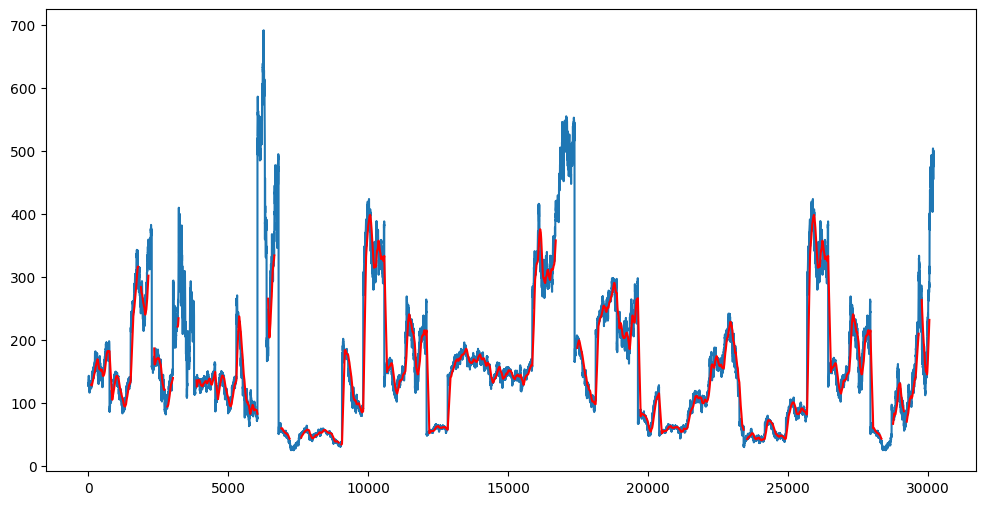

In [154]:
plt.figure(figsize= (12,6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'r')

In [234]:
# Selecting only numeric columns for simplicity
X_numerical = stock_data2.select_dtypes(include=np.number)

# Train a RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_numerical, stock_data2['Close'])

# Display feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_numerical.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)


ValueError: Input y contains NaN.

In [14]:
# Load historical data function
def load_historical_data(company):
    csv_path = f'data/{company.lower()}.csv'
    try:
        data = pd.read_csv(csv_path)
        return data
    except FileNotFoundError:
        return None

# Train linear regression model function
def train_linear_regression_model(data):
    features = data[['Open', 'Close']]
    target = data['Close'].shift(-1)
    features = features[:-1]
    target = target[:-1]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    return model

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30200 entries, 2021-01-05 to 2024-01-04
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       30200 non-null  float64
 1   High       30200 non-null  float64
 2   Low        30200 non-null  float64
 3   Close      30200 non-null  float64
 4   Adj Close  30200 non-null  float64
 5   Volume     30200 non-null  int64  
 6   Ticker     30200 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 1.8+ MB
